<a href="https://colab.research.google.com/github/MATHONSIMM/Capstone-Project-Group-11192/blob/main/Capstone_Project_Group_11192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [5]:
#pip install wbdata

In [2]:
#pip install fredapi

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
import wbdata
from datetime import datetime
from fredapi import Fred
import gdown

# **Data**

## **Sector ETFs**

yfinance: https://finance.yahoo.com/

### Tickers Definition

In [4]:
ETFtickers = [
    "STX40.JO",   # Satrix 40
    "STXRES.JO",  # Satrix RESOURCES
    "STXIND.JO",  # Satrix INDUSTRIES
    "STXFIN.JO",  # Satrix FINANCE
    "STXDIV.JO",

]


#"STXPRO.JO", # property  -Started 2024 we wouls have proxied with PTXTEN (this one was disconntinued as well.)
#    "PREFTX.JO" # has been illiquid
#    "STXGOV.JO", #bonds -started 2020 proxy usin " NFGOVI.JO" and "NFTRCI.JO" (also discontinued)

### Get and Clean data

In [5]:
# Download historical data (2008–2025)
ETFdata = yf.download(ETFtickers, start="2008-01-01", end="2025-09-30", auto_adjust=False)

# Extract Adjusted Close prices
adj_close_ETFdata = ETFdata["Adj Close"]

# Drop columns with all NaNs (delisted / unavailable ETFs)
adj_close_ETFdata = adj_close_ETFdata.dropna(axis=1, how="all")

# Forward-fill missing values (trading holidays)
adj_close_ETFdata = adj_close_ETFdata.ffill()

print("Available ETFs:", adj_close_ETFdata.columns.tolist())
print(adj_close_ETFdata.head())

[*********************100%***********************]  5 of 5 completed

Available ETFs: ['STX40.JO', 'STXDIV.JO', 'STXFIN.JO', 'STXIND.JO', 'STXRES.JO']
Ticker         STX40.JO   STXDIV.JO   STXFIN.JO    STXIND.JO    STXRES.JO
Date                                                                     
2009-01-02  1954.315918  110.273376  593.242065  1661.408936  3969.778564
2009-01-05  2006.501587  113.562637  604.197754  1728.917603  4068.006348
2009-01-06  2068.249512  116.318436  618.049500  1775.426880  4237.672363
2009-01-07  2048.313232  116.269112  612.437256  1730.261597  4188.062012
2009-01-08  2001.735962  113.256439  601.252441  1694.699585  4069.989014


### EDA Plot

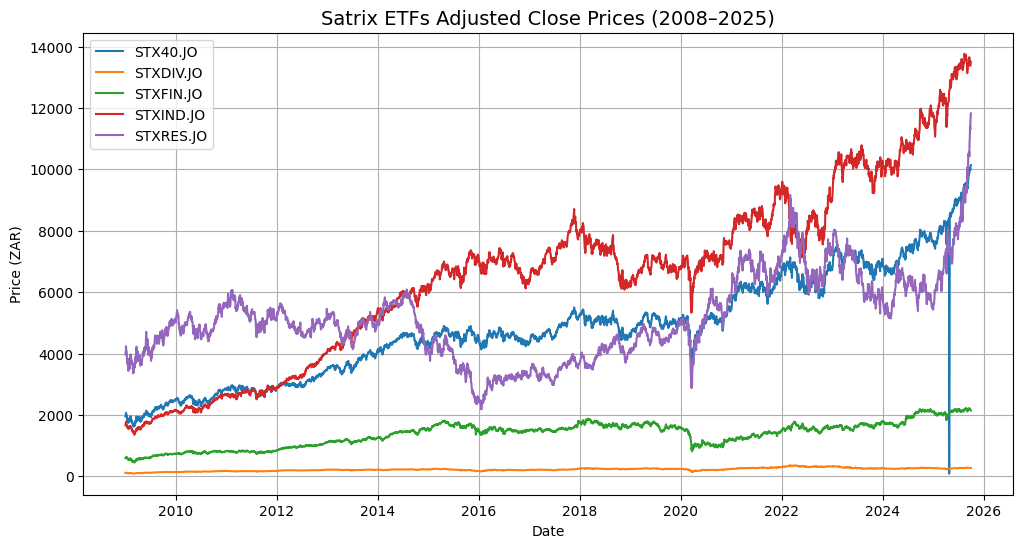

In [6]:
plt.figure(figsize=(12, 6))
for col in adj_close_ETFdata.columns:
    plt.plot(adj_close_ETFdata.index, adj_close_ETFdata[col], label=col)

plt.title("Satrix ETFs Adjusted Close Prices (2008–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (ZAR)")
plt.legend()
plt.grid(True)
plt.show()


## **Sector Macroeconomic**



### FRED (Federal Reserve Economic Data): https://fred.stlouisfed.org/

In [8]:
fred = Fred(api_key='db781b238641fc185968ecffff81be38')

# Define date range
start_date = '2008-01-01'
end_date = '2025-09-30'

# Monthly CPI (Consumer Price Index)
cpi = fred.get_series('ZAFCPIALLMINMEI', start_date, end_date)

# Quarterly GDP
GDP = fred.get_series('NGDPRSAXDCZAQ', start_date, end_date)

# Quarterly Unemployment Rate
#unemp = fred.get_series('ZAFURTOTQDSMEI') #data outdated

# Monthly 10-year SAGB yield
ZAGB = fred.get_series('IRLTLT01ZAM156N', start_date, end_date)

# Combine (with aligned index)
Freddata = pd.concat([cpi, GDP, ZAGB], axis=1)
Freddata.columns = ['CPI', 'GDP', "ZAGB10y"]
Freddata = Freddata.dropna()
print(Freddata.tail())


                 CPI        GDP    ZAGB10y
2024-01-01  152.9674  1164447.9  11.420455
2024-04-01  155.7972  1167433.1  12.274762
2024-07-01  156.8977  1164042.3  11.021739
2024-10-01  157.2121  1168684.4  10.464348
2025-01-01  157.6837  1169838.5  10.419545


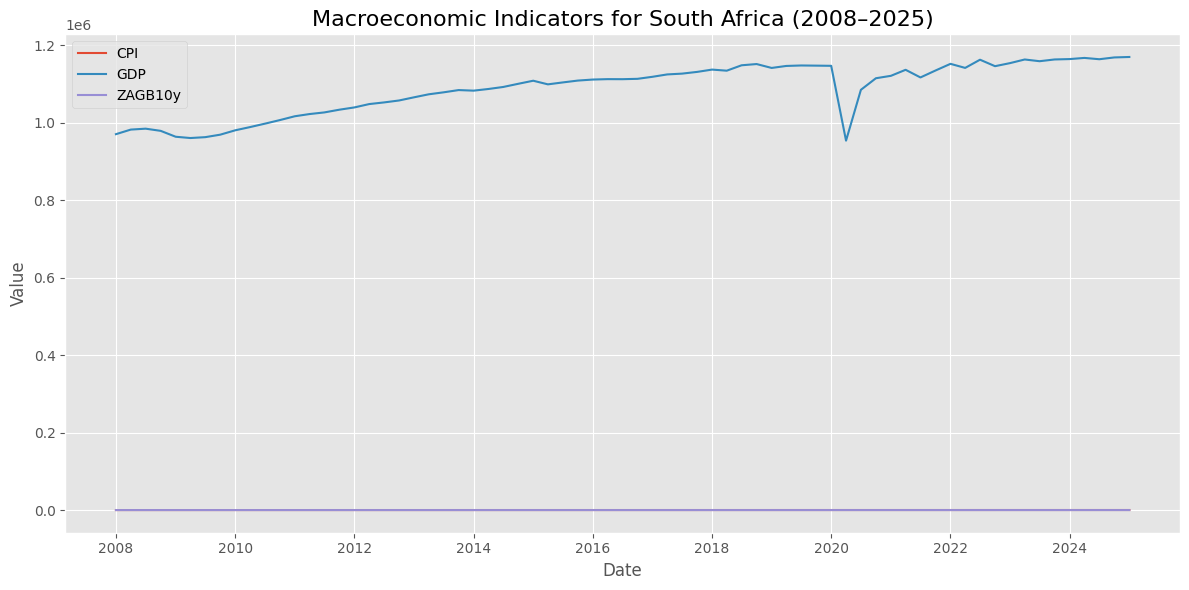

In [11]:
# Set figure size and style
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plot each macroeconomic indicator
for column in Freddata.columns:
    plt.plot(Freddata.index, Freddata[column], label=column)

# Add titles and labels
plt.title('Macroeconomic Indicators for South Africa (2008–2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### yfinance: https://finance.yahoo.com/

In [12]:
# Gold price
gold = yf.download('GC=F', start='2008-01-01', end='2025-09-30')

# USD/ZAR exchange rate
usd_zar = yf.download('ZAR=X', start='2008-01-01', end='2025-09-30')


print(usd_zar.tail())


/tmp/ipython-input-3323087067.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download('GC=F', start='2008-01-01', end='2025-09-30')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3323087067.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_zar = yf.download('ZAR=X', start='2008-01-01', end='2025-09-30')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open Volume
Ticker          ZAR=X      ZAR=X      ZAR=X      ZAR=X  ZAR=X
Date                                                         
2025-09-23  17.330900  17.381300  17.228701  17.330900      0
2025-09-24  17.228100  17.344999  17.207001  17.228100      0
2025-09-25  17.327280  17.440630  17.280100  17.327280      0
2025-09-26  17.422001  17.482500  17.336100  17.422001      0
2025-09-29  17.340401  17.349091  17.238501  17.340401      0


In [13]:
Macrotickers = [
    "GC=F",   # Gold price
    "ZAR=X",  # USD/ZAR Exchange rate
]

In [14]:
# Download historical data (2008–2025)
MacroYfindata = yf.download(Macrotickers, start="2008-01-01", end="2025-09-30", auto_adjust=False)

# Extract Adjusted Close prices
MacroYfinadj_close_data = MacroYfindata["Adj Close"]

# Drop columns with all NaNs (delisted / unavailable ETFs)
MacroYfinadj_close_data = MacroYfinadj_close_data.dropna(axis=1, how="all")

# Forward-fill missing values (trading holidays)
MacroYfinadj_close_data = MacroYfinadj_close_data.ffill()

print("Available ETFs:", MacroYfinadj_close_data.columns.tolist())
print(MacroYfinadj_close_data.head())

[*********************100%***********************]  2 of 2 completed

Available ETFs: ['GC=F', 'ZAR=X']
Ticker            GC=F   ZAR=X
Date                          
2008-01-01         NaN  6.8464
2008-01-02  857.000000  6.8220
2008-01-03  866.400024  6.8400
2008-01-04  863.099976  6.8250
2008-01-07  859.599976  6.9132


### South African Reserve Bank (SARB) : https://www.resbank.co.za/en/home/what-we-do/statistics/key-statistics/

In [15]:
file_id = "1q6zBoxXQ377W6HpnCO6gG5NkcjDPO6wR"
url = f"https://drive.google.com/uc?id={file_id}"

# Download and read the CSV
gdown.download(url, "data.csv", quiet=True)
df = pd.read_csv("data.csv", skiprows=3)

# Preview the data
print(df.head())

          Date  Value
0   2025-09-30    7.0
1   2025-09-29    7.0
2   2025-09-26    7.0
3   2025-09-25    7.0
4   2025-09-23    7.0


# **Data Processing**

## **Load Full data**

In [16]:
# Load all data (already downloaded from Yahoo and FRED)
etf_data = adj_close_ETFdata.copy()            # JSE Sector ETFs
macro_data = Freddata.copy()                   # CPI, GDP, 10Y yield
market_data = MacroYfinadj_close_data.copy()   # Gold, USD/ZAR

# Initial inspection
print("ETF shape:", etf_data.shape)
print("Macro shape:", macro_data.shape)
print("Market shape:", market_data.shape)


ETF shape: (4198, 5)
Macro shape: (69, 3)
Market shape: (4628, 2)


In [17]:
macro_data.tail()

,CPI,GDP,ZAGB10y
2024-01-01,152.9674,1164447.9,11.420455
2024-04-01,155.7972,1167433.1,12.274762
2024-07-01,156.8977,1164042.3,11.021739
2024-10-01,157.2121,1168684.4,10.464348
2025-01-01,157.6837,1169838.5,10.419545


## **Missing Values**

In [18]:
# Handle missing values
etf_data = etf_data.asfreq('B').ffill().bfill()  # fill forward and backward for continuity
#macro_data = macro_data.resample('ME').interpolate(method='linear').ffill()
market_data = market_data.asfreq('B').ffill().bfill()

# Drop columns with excessive NaNs (if any ETF was delisted or thinly traded)
threshold = 0.9 * len(etf_data)
etf_data = etf_data.dropna(axis=1, thresh=threshold)


In [19]:
print("Missing values after cleaning:")
print(etf_data.isna().mean().sort_values(ascending=False).head())

Missing values after cleaning:
Ticker
STX40.JO     0.0
STXDIV.JO    0.0
STXFIN.JO    0.0
STXIND.JO    0.0
STXRES.JO    0.0
dtype: float64


## **Outlier Detection and Winsorization**

In [20]:
def winsorize_series(s, factor=3.0):
    """Cap extreme return outliers using the IQR rule."""
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - factor * iqr, q3 + factor * iqr
    return s.clip(lower, upper)

# Calculate daily log returns and winsorize
daily_returns = np.log(etf_data / etf_data.shift(1))
daily_returns = daily_returns.apply(winsorize_series, axis=0).fillna(0)

## **Aggregate Returns to Monthly Frequency**

In [21]:
monthly_prices = etf_data.resample('ME').last()
monthly_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()

## **Upsample Quarterly Macroeconomic Data**

In [22]:
macro_monthly = macro_data.resample('ME').ffill()

# Compute quarterly or annual growth/change metrics
# CPI quarter-on-quarter change
macro_monthly['CPI_qoq'] = macro_monthly['CPI'].pct_change(3) * 100
macro_monthly['GDP_qoq'] = macro_monthly['GDP'].pct_change(3) * 100
macro_monthly['Yield_change'] = macro_monthly['ZAGB10y'].diff()

# Drop first few missing rows from growth computations
macro_monthly = macro_monthly.dropna()

In [80]:
#macro_monthly

## **Process Market Proxy Variables (Gold, USD/ZAR)**

In [23]:
market_monthly = market_data.resample('ME').last().ffill()
market_monthly['Gold_change'] = market_monthly['GC=F'].pct_change() * 100
market_monthly['USDZAR_change'] = market_monthly['ZAR=X'].pct_change() * 100
market_monthly = market_monthly[['Gold_change', 'USDZAR_change']].dropna()

In [78]:
#market_monthly

## **Merge All Data and Align by Date**

In [24]:
# Align all datasets on common monthly index
data_all = monthly_returns.join([macro_monthly, market_monthly], how='inner')

# Drop any rows with residual missing values
data_all = data_all.dropna(axis=0, how='any')

# Separate predictors (X) and targets (sector returns R)
returns = monthly_returns.loc[data_all.index]
features = data_all.drop(columns=returns.columns, errors='ignore')

print("Final dataset shape:")
print("Returns (R):", returns.shape)
print("Features (X):", features.shape)

Final dataset shape:
Returns (R): (192, 5)
Features (X): (192, 8)


In [25]:
data_all.tail()

,STX40.JO,STXDIV.JO,STXFIN.JO,STXIND.JO,STXRES.JO,CPI,GDP,ZAGB10y,CPI_qoq,GDP_qoq,Yield_change,Gold_change,USDZAR_change
2024-09-30,0.039880,0.047850,0.031988,0.055589,0.032541,156.8977,1164042.3,11.021739,0.706367,-0.290449,0.000000,5.706153,-3.608558
2024-10-31,-0.025963,-0.021605,-0.022841,-0.043310,0.016970,157.2121,1168684.4,10.464348,0.200385,0.398791,-0.557391,3.876937,3.263710
2024-11-30,-0.013219,-0.014760,0.004726,0.003148,-0.073687,157.2121,1168684.4,10.464348,0.200385,0.398791,0.000000,-2.968997,2.467568
2024-12-31,-0.007596,-0.011215,-0.017599,0.026454,-0.059476,157.2121,1168684.4,10.464348,0.200385,0.398791,0.000000,-1.046295,3.784147
2025-01-31,0.025240,-0.014998,-0.040034,0.012710,0.161131,157.6837,1169838.5,10.419545,0.299977,0.098752,-0.044802,6.971704,-1.053027


## **Normalize Features and Returns**

In [26]:
scaler_X = StandardScaler()
scaler_R = StandardScaler()

X_scaled = pd.DataFrame(
    scaler_X.fit_transform(features),
    index=features.index,
    columns=features.columns
)

R_scaled = pd.DataFrame(
    scaler_R.fit_transform(returns),
    index=returns.index,
    columns=returns.columns
)

## **Verify Alignment**

In [27]:
print("Aligned Period:", X_scaled.index.min(), "to", X_scaled.index.max())
print("Macro columns:", list(macro_monthly.columns))
print("Market columns:", list(market_monthly.columns))

Aligned Period: 2009-02-28 00:00:00 to 2025-01-31 00:00:00
Macro columns: ['CPI', 'GDP', 'ZAGB10y', 'CPI_qoq', 'GDP_qoq', 'Yield_change']
Market columns: ['Gold_change', 'USDZAR_change']
